***
## YOLO V3 快速上手版
## 本篇教學訓練自己的的資料集，原作者github有提供如何使用VOC2007進行Demo可以參考 

## qqwweee/keras-yolo3 https://github.com/qqwweee/keras-yolo3



***
## Step 0:
在github文檔說明中，有提供以下運作說明(Quick Start)。
## Quick Start:
 
- [x] 1.Download YOLOv3 weights from YOLO website.
- [x] 2.Convert the Darknet YOLO model to a Keras model.
- [ ] 3.Run YOLO detection.
#### 在第一點與第二點，皆已先完成，檔案放在“model_data/yolo_weights.h5”，pretrain model的路徑，已經先設定完畢。
#### 第三點則是直接拿來測試，若要進行訓練請跳過。

***
### Step 1:
### 利用 “owndata.py”將自己的訓練資料與標記改寫成yolo v3可以使用的格式，原始圖片請放在 “own_data/img”，label的xml請直接放在“own_data/xml”，名稱請統一，並且請進入“owndata.py” 修改 “classes” 請依照類別的順序修改內容

### 最後會在keras-yolo3下面產生 “own_datapath.txt”這就是要餵給yolov3的文件

#### “own_datapath.txt”的內容每一行  會是以下(路徑 空白一格,boundbox,類別index)
#### Example: ”own_data/img/car1.jpg 52,12,544,313,6“


### 修改完畢後，跑以下cell訓練

In [1]:
%run owndata.py

檔案： SNAG-0001.jpg
檔案： SNAG-0008.jpg
檔案： SNAG-0003.jpg
檔案： SNAG-0002.jpg
檔案： SNAG-0007.jpg
檔案： SNAG-0000.jpg
檔案： SNAG-0006.jpg
檔案： SNAG-0004.jpg
檔案： SNAG-0009.jpg
檔案： SNAG-0010.jpg
檔案： SNAG-0005.jpg
['SNAG-0001.jpg', 'SNAG-0008.jpg', 'SNAG-0003.jpg', 'SNAG-0002.jpg', 'SNAG-0007.jpg', 'SNAG-0000.jpg', 'SNAG-0006.jpg', 'SNAG-0004.jpg', 'SNAG-0009.jpg', 'SNAG-0010.jpg', 'SNAG-0005.jpg']


In [2]:
%run convert.py yolov3.cfg yolov3.weights model_data/yolo_weights.h5

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

***
### Step 2:
### 請改寫 “model_data/own_classes.txt”裡面的類別，裡面有範例，請依照順序改為自己的類別，一些細節參數或是要改變路徑，在”train.py“裡面有說明，目前路徑都已經規劃好，不需要更改
### 修改完畢後，跑以下cell訓練，訓練完畢後，最後會在產生“log/000/trained_weights_final.h5”，這個weight的檔案請更名為”yolo_weights.h5”，並且取代放在model_data資料夾下的同檔案。
### 注意，在“train.py”可以關閉GPU，若發生訓練卡住的狀況，裡面有說明可以更改設置

### @請注意 "train.py" 裡面有 val_split = 0.5，將全部吃進去的圖片，一半拿來進行驗證，若不需要那麼多，請到裡面進行修改，記得必須數量達到能夠切割的資料比例，否則會發生錯誤。
### @由於方便，目前的內容裡面是以同一張圖片重複6次，進行訓練。

In [3]:
%run train.py

Create YOLOv3 model with 9 anchors and 1 classes.


/opt/conda/lib/python3.6/site-packages/keras/engine/saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 18) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/opt/conda/lib/python3.6/site-packages/keras/engine/saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((18,) vs (255,)).
  weight_values[i].shape))
/opt/conda/lib/python3.6/site-packages/keras/engine/saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 18) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/opt/conda/lib/python3.6/site-packages/keras/engine/saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((18,) vs (255,)).
  weight_values[i].shape))
/opt/conda/lib/python3.6/site-packages/keras/engine/saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_75 due to mismatch in shape ((1,

Load weights model_data/yolo_weights.h5.
Freeze the first 249 layers of total 252 layers.
Train on 6 samples, val on 5 samples, with batch size 1.
Epoch 1/50
6/6 [==============================] - 3s 559ms/step - loss: 8029.5684 - val_loss: 5535.3388
Epoch 2/50
6/6 [==============================] - 0s 73ms/step - loss: 4032.4604 - val_loss: 2765.0905
Epoch 3/50
6/6 [==============================] - 0s 79ms/step - loss: 2008.4308 - val_loss: 1671.3231
Epoch 4/50
6/6 [==============================] - 0s 77ms/step - loss: 1188.7811 - val_loss: 1031.2840
Epoch 5/50
6/6 [==============================] - 0s 81ms/step - loss: 782.6859 - val_loss: 823.4390
Epoch 6/50
6/6 [==============================] - 0s 77ms/step - loss: 555.8144 - val_loss: 666.6279
Epoch 7/50
6/6 [==============================] - 0s 76ms/step - loss: 448.7488 - val_loss: 456.4155
Epoch 8/50
6/6 [==============================] - 0s 75ms/step - loss: 375.3289 - val_loss: 382.8262
Epoch 9/50
6/6 [====================

In [4]:
cp logs/000/*final.h5 model_data/yolo_weights.h5

***
### Step 3:
### 修改“yolo.py”之中的“classes_path”的內容，請改成“model_data/own_classes.txt”，自己類別的txt文件，也就是在step 1的同一份，修改後，由於jupyternote的bug，請先重複運行以下的cell直到可以正常顯示圖片，之後再起動下下個cell的程式碼來運行測試，啟動後會需要輸入圖片名稱，如果放在與程式碼同一個資料夾類，直接輸入名稱即可讀取圖片進行測試。
### 注意：如果測試後發現圖片難以辨識出來，請調整“yolo.py”中的“score”，程式碼裡面有說明。

### 這個Cell為測試圖片顯示，重複運行此Cell直到正確顯示圖片後，在運行下下個Cell進行測試。

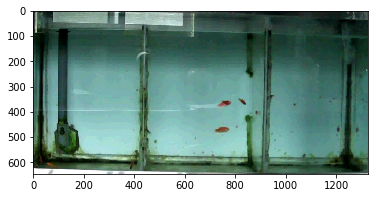

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./Test_img/SNAG-0072.jpg',cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.imshow(image)
plt.show()

### 運行以下的程式，等待一段時間後會出現"Input image filename:"，若圖片的檔案位址與此程式碼相同，請在後面輸入所要辨識的圖片名稱，若在其他資料夾中，請連帶位置跟檔名一起輸入。

In [ ]:
%run yolo_video.py

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


model_data/yolo_weights.h5 model, anchors, and classes loaded.
!!! TYPE: <class 'str'> <class 'int'> <class 'float'> <class 'tuple'>
(416, 416, 3)
